In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Importing Data Sets

In [2]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [3]:
pd.options.display.max_columns = None


In [4]:
train_inpatientdata.sample(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
5337,BENE30254,CLM37959,2009-02-11,2009-02-18,PRV53763,6000,PHY372992,PHY372992,NaN,2009-02-11,43491,1068.0,2009-02-18,095,43411,2761,4019,4010,32723,40200,44021,2724,44281,V1254,3893.0,NaN,NaN,NaN,NaN,NaN
15014,BENE66205,CLM35771,2009-01-27,2009-02-03,PRV53407,5000,PHY419830,NaN,NaN,2009-01-27,7802,1068.0,2009-02-03,195,5070,42731,2752,2768,5990,33182,25000,7102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_outpatientdata.sample(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
456943,BENE141695,CLM625109,2009-10-11,2009-10-23,PRV55715,60,PHY377118,NaN,NaN,2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
212166,BENE71928,CLM485117,2009-07-23,2009-08-06,PRV52649,30,PHY322816,NaN,NaN,V4585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## Warmup Question 1:

- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.
- How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [6]:
#How many medical doctors are there in the train outpatient dataset?
train_outpatientdata.AttendingPhysician.unique().shape  # there are 74,110 attending physicians

#How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
train_inpatientdata.AttendingPhysician.unique().shape  # there are 11,605 attending phsyicians. There are more providers on the outpatient data

(11605,)

In [7]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))



In [8]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient.BeneID.unique().shape

(138556,)

In [9]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [10]:
train_potentialfraud.shape

(5410, 2)

In [11]:
full_data = pd.merge(full_data, train_potentialfraud, on='Provider', how='left')


In [12]:
full_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No


In [13]:
full_data.isnull().sum(axis=0)

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

## Preprocessing of Data

In [14]:
all_na = (full_data.isnull().sum()/len(full_data)) * 100
all_na
all_na = all_na.drop(all_na[all_na == 0].index)     #.sort_values(ascending=False)[:30]
all_na= all_na.drop(all_na[all_na==0]).sort_values(ascending=False)
all_na= all_na.reset_index(name='missing_ratio')
all_na

#missing_data = pd.DataFrame({'Missing_Ratio' :all_na})


,index,missing_ratio
0,ClmProcedureCode_6,100.000000
1,ClmProcedureCode_5,99.998388
2,ClmProcedureCode_4,99.978861
3,ClmProcedureCode_3,99.826410
4,DOD,99.259957
5,ClmDiagnosisCode_10,99.102490
6,ClmProcedureCode_2,99.016501
7,ClmProcedureCode_1,95.824160
8,DiagnosisGroupCode,92.749337
9,AdmissionDt,92.749337


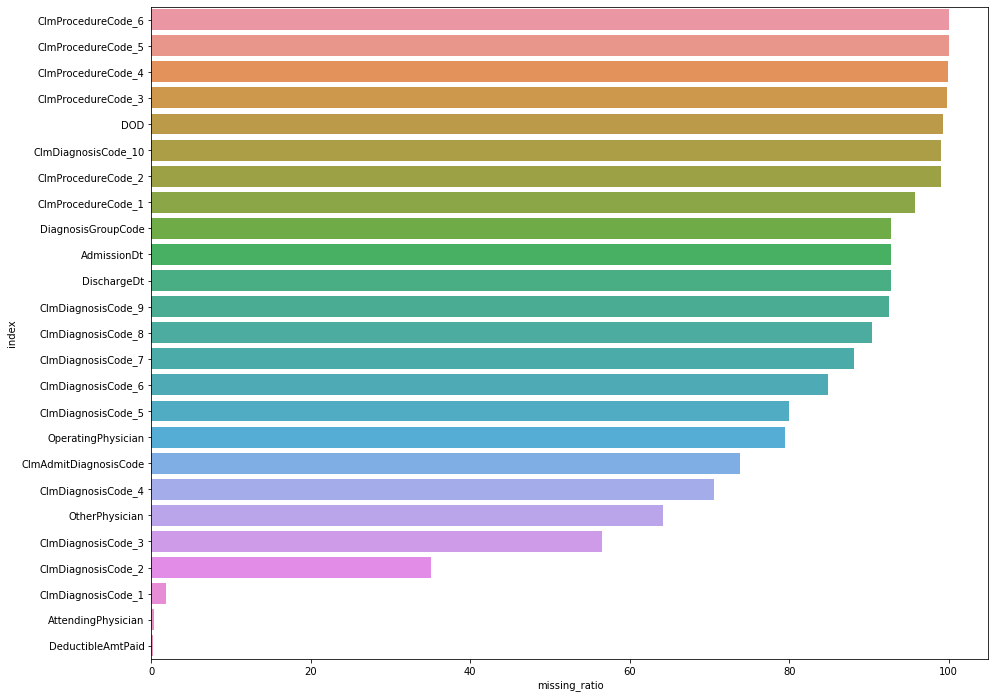

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(y='index', x='missing_ratio', orient='h', data=all_na)

In [16]:
#Remove the Claim procedure code 6 because all values are missing.
#full_data.drop('ClmProcedureCode_6', axis=1 , inplace=True)


In [17]:
#Impute the missing values of claim procedure codes and claim diagnosi code

claim_diag_proc = full_data.filter(regex='ClmProcedureCode|ClmDiagnosisCode|DiagnosisGroupCode|ClmAdmitDiagnosisCode')
claim_diag_proc = claim_diag_proc.fillna(0)
claim_diag_proc.isnull().sum()

ClmAdmitDiagnosisCode    0
DiagnosisGroupCode       0
ClmDiagnosisCode_1       0
ClmDiagnosisCode_2       0
ClmDiagnosisCode_3       0
ClmDiagnosisCode_4       0
ClmDiagnosisCode_5       0
ClmDiagnosisCode_6       0
ClmDiagnosisCode_7       0
ClmDiagnosisCode_8       0
ClmDiagnosisCode_9       0
ClmDiagnosisCode_10      0
ClmProcedureCode_1       0
ClmProcedureCode_2       0
ClmProcedureCode_3       0
ClmProcedureCode_4       0
ClmProcedureCode_5       0
ClmProcedureCode_6       0
dtype: int64

In [18]:
#remove any columns that has claims
#partial_data = full_data.filter(regex='^((?!Clm|Diagnosis))')

In [19]:
#merge the imputed columns to the full data
# full_data= pd.concat([partial_data, claim_diag_proc], axis=1)
# full_data.shape

In [20]:
# #impute physicians with none
# full_data['AttendingPhysician'] = full_data['AttendingPhysician'].fillna('None')

# full_data['AttendingPhysician'] = full_data['AttendingPhysician'].fillna('None')

# full_data.isnull().sum()


         

In [21]:
full_data.Provider.unique().shape

(5410,)

## Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients?

In [22]:
patient_chronic = full_data.filter(regex='BeneID|Chronic').groupby('BeneID').mean().reset_index()
patient_chronic1= patient_chronic.filter(regex='Chronic')

#add the total chronic condition for each patient
numChronicCond= patient_chronic1.replace(to_replace= 2, value=0).sum(axis=1)

patient_chronic['numChronicCond'] = numChronicCond
patient_chronic.numChronicCond.unique()

array([ 1,  4,  7,  6,  5,  0,  3,  2,  9,  8, 10, 11], dtype=int64)

## The inpatient patients has a higher median of number of chronic conditions than the outpatient patients.  This means that inpatient patients have worse chronic conditions than the outpatient patients.

Text(0.5, 0, 'type of patient')

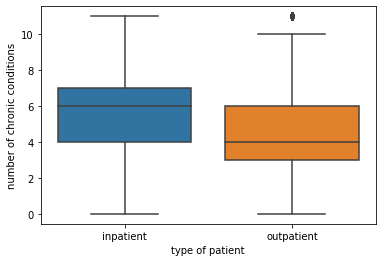

In [23]:

patientType = full_data.filter(regex='Bene|Type')
patientCond = pd.merge(patientType, patient_chronic, on='BeneID', how='left')
sns.boxplot(x='patientType', y='numChronicCond', data=patientCond)
plt.ylabel('number of chronic conditions')
plt.xlabel('type of patient')
                       

##  Do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [24]:
bene_claim = full_data.groupby('BeneID')['ClaimID'].size().reset_index()
claimsCond = pd.merge(bene_claim, patient_chronic, on='BeneID', how='left')


## Patients with worse chronic conditions had higher total claims.

Text(0, 0.5, 'Total claims')

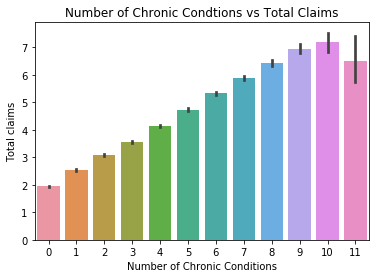

In [25]:
sns.barplot(x='numChronicCond', y='ClaimID', data=claimsCond)
plt.title('Number of Chronic Condtions vs Total Claims')
plt.xlabel('Number of Chronic Conditions')
plt.ylabel('Total claims')

## How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [26]:
#There are 31,289 distinct inpatient patients
full_data.loc[full_data.patientType=='inpatient'].BeneID.unique().shape

#Tehre are 133,980 distinct outpatient patients
full_data.loc[full_data.patientType=='outpatient'].BeneID.unique().shape

(133980,)

## Do doctors serve for different providers?
## Study the distribution of hospital counts/doctor?
## Is it possible to characterize those doctors who move around among different providers?

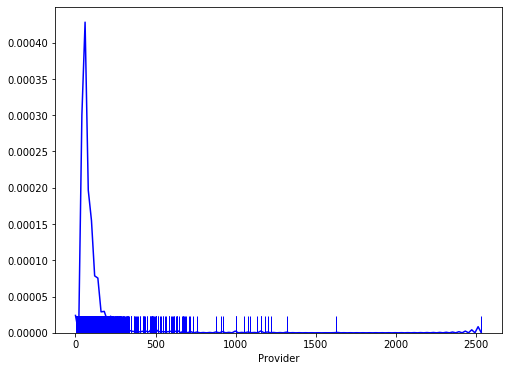

In [27]:
provider_doctor = full_data.filter(regex='Provider|Attending|Potential')
provider_doctor = provider_doctor.groupby(['AttendingPhysician', 'PotentialFraud'])['Provider'].count().reset_index()

f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(provider_doctor.Provider, hist=False, rug=True, color='b')



In [28]:
provider_doctor.loc[provider_doctor.Provider >20]

,AttendingPhysician,PotentialFraud,Provider
43,PHY311061,No,30
49,PHY311067,No,69
82,PHY311115,No,138
105,PHY311151,Yes,59
116,PHY311170,No,26
...,...,...,...
83406,PHY433915,No,111
83410,PHY433925,Yes,27
83417,PHY433940,No,69
83464,PHY434016,Yes,75


## Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

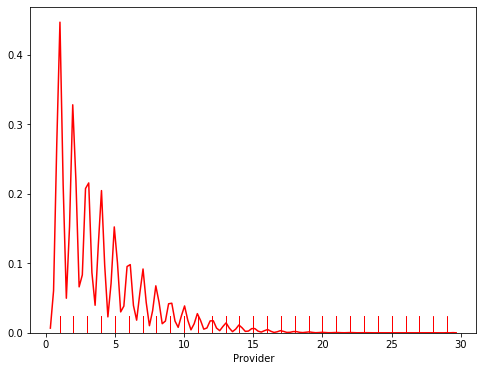

In [29]:
provider_patient = full_data[['Provider', 'BeneID']].copy()

provider_patient = provider_patient.groupby('BeneID')['Provider'].count().reset_index()
provider_patient.Provider.unique()

f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(provider_patient.Provider, hist=False, rug=True, color='r')


## Do the same providers provide both inpatient and outpatient services? Summarize your finding.

In [30]:
provider_inpatient = full_data[['Provider', 'patientType']].copy()
provider_inpatient= provider_inpatient.loc[provider_inpatient.patientType=='inpatient']
provider_inpatient

provider_outpatient = full_data[['Provider', 'patientType']].copy()
provider_outpatient= provider_outpatient.loc[provider_outpatient.patientType=='outpatient']
provider_outpatient

,Provider,patientType
40474,PRV56011,outpatient
40475,PRV57610,outpatient
40476,PRV57595,outpatient
40477,PRV56011,outpatient
40478,PRV56011,outpatient
...,...,...
558206,PRV53699,outpatient
558207,PRV53702,outpatient
558208,PRV53676,outpatient
558209,PRV53689,outpatient


In [31]:
#There are 1694 providers that provide both inpatient and outpatient services
provider_services = pd.merge(provider_outpatient, provider_inpatient, on='Provider')
provider_services.Provider.unique().shape


(1694,)

## Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [32]:
#There are 26,713 patients that received both inpatient and outpatient services

patient_inpatient = full_data[['BeneID', 'patientType']].copy()
patient_inpatient = patient_inpatient.loc[patient_inpatient.patientType=='inpatient']
patient_inpatient

patient_outpatient = full_data[['BeneID', 'patientType']].copy()
patient_outpatient = patient_outpatient.loc[patient_outpatient.patientType=='outpatient']

patient_services = pd.merge(patient_outpatient, patient_inpatient, on='BeneID')
#patient_services.BeneID.unique().shape
